## In this jupyter notebook we explore the influence that the choice of likelihoods can have in our Bayesian estimations. 

We will see what happens when we add outliers to it, and how a distribution with heavier tails can help with that.

Thanks to ChatGPT for helping in the creation and comments of the code

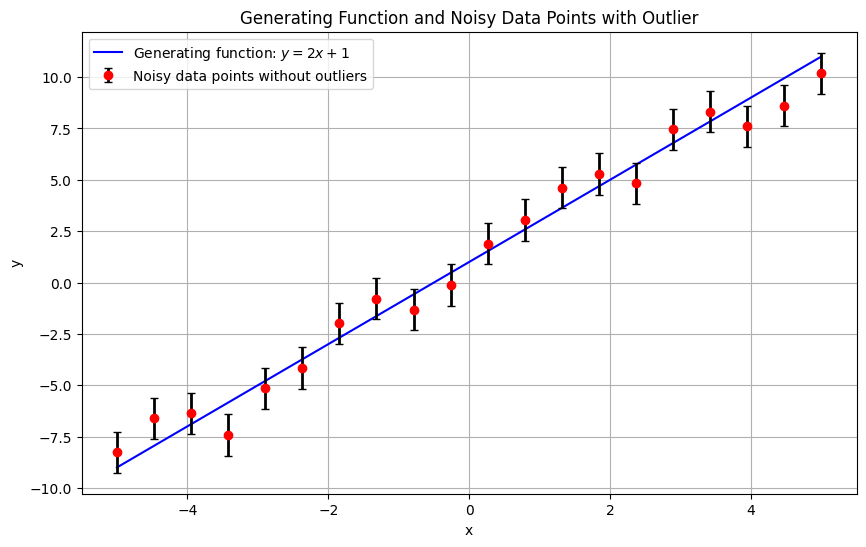

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(142857)

# Generate 20 points normally distributed around a straight line y = 2x + 1
x = np.linspace(-5, 5, 20)

# Noise level
noise_size = 1
noise = np.random.normal(0, noise_size, size=x.shape)
y = 2 * x + 1 + noise


# Generating function
y_true = 2 * x + 1

# Plot the points and the generating function
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Generating function: $y = 2x + 1$', color='blue')
plt.errorbar(x, y, yerr=noise_size, fmt='o', color='red', label='Noisy data points without outliers', ecolor='black', elinewidth=2, capsize=3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Generating Function and Noisy Data Points with Outlier')
plt.grid(True)
plt.show()


Acceptance ratio: 0.33


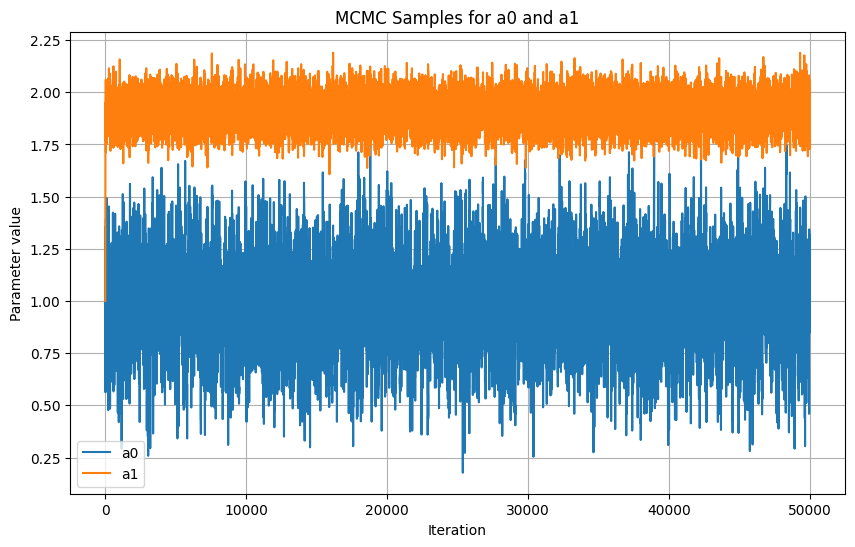

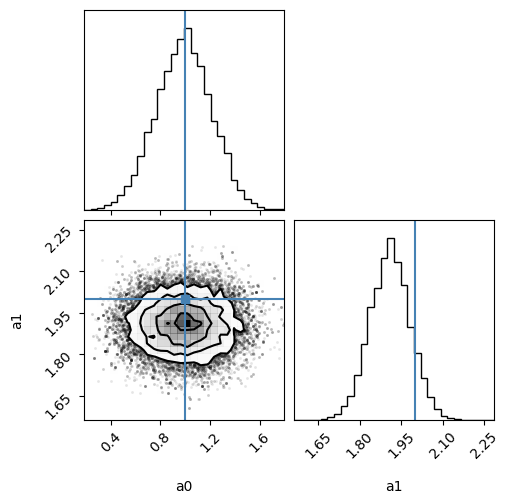

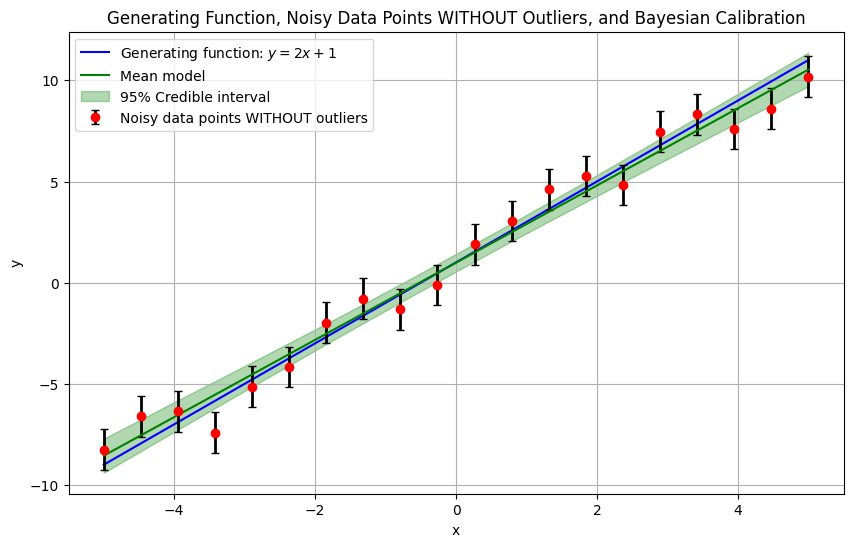

In [97]:
# Bayesian calibration using MCMC with Metropolis-Hastings algorithm
def log_likelihood(a0, a1, x, y, sigma=1):
    y_model = a0 + a1 * x
    return -0.5 * np.sum(((y - y_model) / sigma) ** 2)

def log_prior(a0, a1):
    return 0  # Assuming flat priors

def log_posterior(a0, a1, x, y, sigma=1):
    return log_prior(a0, a1) + log_likelihood(a0, a1, x, y, sigma)

# Initial guess
a0, a1 = 1, 1
n_iterations = 50000
sigma_proposal = 0.2

# Storage for samples
samples = np.zeros((n_iterations, 2))
samples[0, :] = [a0, a1]

# Count the number of acceptances
n_acceptances = 0

for i in range(1, n_iterations):
    a0_proposal = a0 + np.random.normal(0, sigma_proposal)
    a1_proposal = a1 + np.random.normal(0, sigma_proposal)
    
    log_posterior_current = log_posterior(a0, a1, x, y, sigma=1)
    log_posterior_proposal = log_posterior(a0_proposal, a1_proposal, x, y, sigma=1)
    
    acceptance_prob = np.exp(log_posterior_proposal - log_posterior_current)
    
    if np.random.rand() < acceptance_prob:
        a0, a1 = a0_proposal, a1_proposal
        n_acceptances += 1
    
    samples[i, :] = [a0, a1]

# Calculate and print the acceptance ratio
acceptance_ratio = n_acceptances / n_iterations
print(f'Acceptance ratio: {acceptance_ratio:.2f}')

# Plotting the samples
plt.figure(figsize=(10, 6))
plt.plot(samples[:, 0], label='a0')
plt.plot(samples[:, 1], label='a1')
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.legend()
plt.title('MCMC Samples for a0 and a1')
plt.grid(True)
plt.show()

# Corner plot with better limits
import corner

# Determine the limits for the corner plot
a0_min, a0_max = np.percentile(samples[:, 0], [1, 99])*(0.4,1.2)
a1_min, a1_max = np.percentile(samples[:, 1], [1, 99])*(0.9,1.1)

corner.corner(samples, labels=["a0", "a1"], truths=[1, 2], range=[(a0_min, a0_max), (a1_min, a1_max)], bins=30)
plt.show()

# Sampling 10,000 curves from the visited samples
n_samples = 10000
indices = np.random.choice(range(n_iterations), n_samples, replace=True)
sampled_a0 = samples[indices, 0]
sampled_a1 = samples[indices, 1]

# Generate y values for each sampled parameter set
y_samples = np.array([a0 + a1 * x for a0, a1 in zip(sampled_a0, sampled_a1)])

# Calculate mean and credible intervals for each x
y_mean = np.mean(y_samples, axis=0)
y_lower = np.percentile(y_samples, 2.5, axis=0)
y_upper = np.percentile(y_samples, 97.5, axis=0)

# Plotting the estimated mean model and credible intervals
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Generating function: $y = 2x + 1$', color='blue')
plt.errorbar(x, y, yerr=noise_size, fmt='o', color='red', label='Noisy data points WITHOUT outliers', ecolor='black', elinewidth=2, capsize=3)
plt.plot(x, y_mean, label='Mean model', color='green')
plt.fill_between(x, y_lower, y_upper, color='green', alpha=0.3, label='95% Credible interval')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Generating Function, Noisy Data Points WITHOUT Outliers, and Bayesian Calibration')
plt.grid(True)
plt.show()



## Adding two outliers

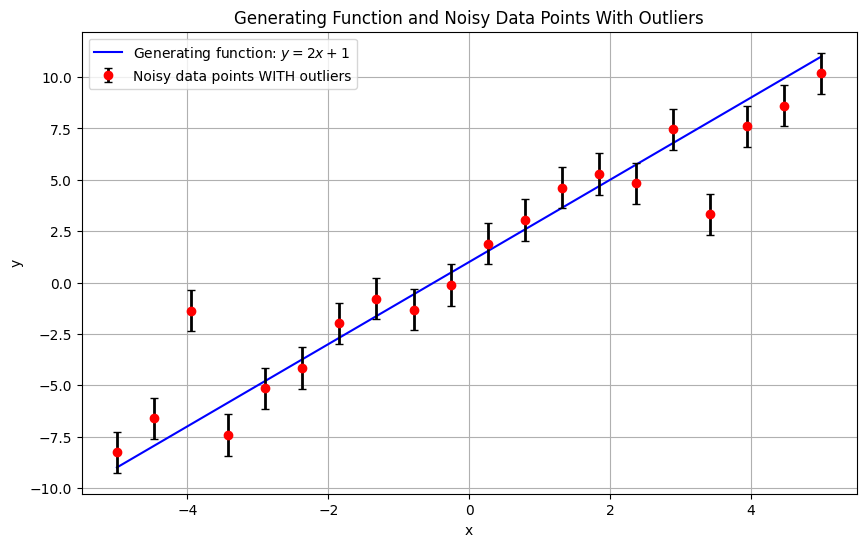

In [99]:
# Set random seed for reproducibility
np.random.seed(142857)

# Generate 20 points normally distributed around a straight line y = 2x + 1
x = np.linspace(-5, 5, 20)

# Noise level
noise_size = 1
noise = np.random.normal(0, noise_size, size=x.shape)
y = 2 * x + 1 + noise

# # Artificially modify one of the points to be further away from the generating function
y[2] += 5  # Adding a large value to the first point to create an outlier
y[-4] -= 5  # Adding a large value to the first point to create an outlier

# Generating function
y_true = 2 * x + 1
# Plot the points and the generating function
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Generating function: $y = 2x + 1$', color='blue')
plt.errorbar(x, y, yerr=noise_size, fmt='o', color='red', label='Noisy data points WITH outliers', ecolor='black', elinewidth=2, capsize=3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Generating Function and Noisy Data Points With Outliers')
plt.grid(True)
plt.show()


Acceptance ratio: 0.34


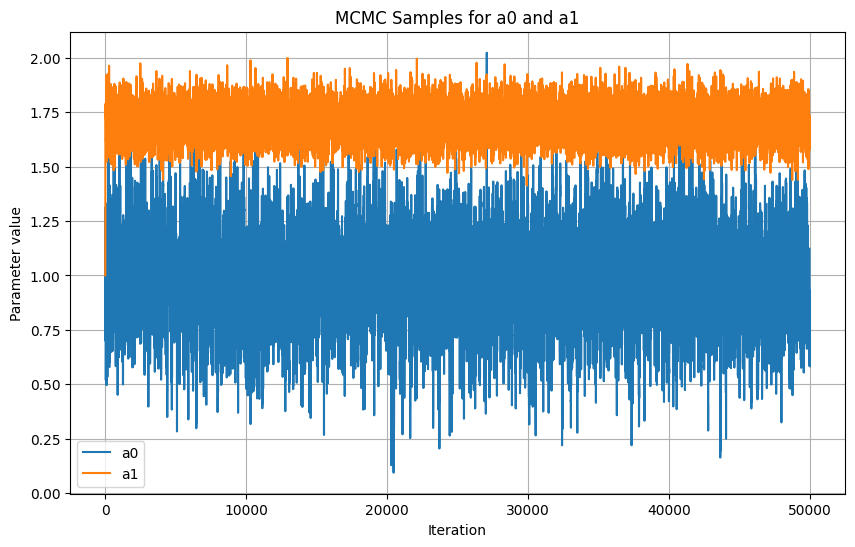

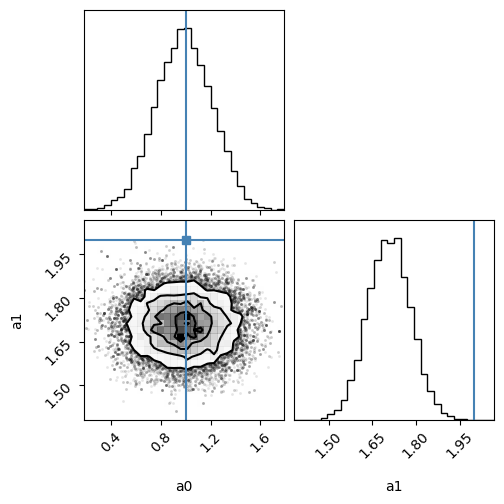

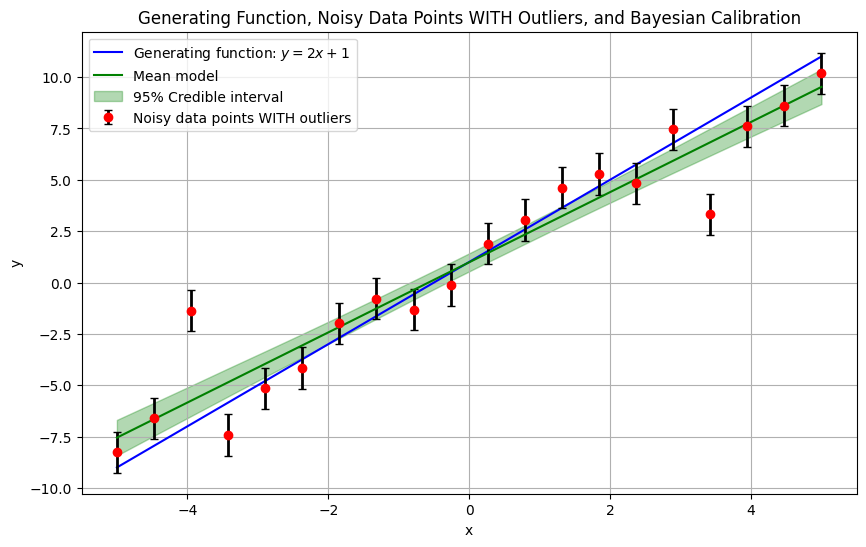

In [85]:
# Bayesian calibration using MCMC with Metropolis-Hastings algorithm
def log_likelihood(a0, a1, x, y, sigma=1):
    y_model = a0 + a1 * x
    return -0.5 * np.sum(((y - y_model) / sigma) ** 2)

def log_prior(a0, a1):
    return 0  # Assuming flat priors

def log_posterior(a0, a1, x, y, sigma=1):
    return log_prior(a0, a1) + log_likelihood(a0, a1, x, y, sigma)

# Initial guess
a0, a1 = 1, 1
n_iterations = 50000
sigma_proposal = 0.2

# Storage for samples
samples = np.zeros((n_iterations, 2))
samples[0, :] = [a0, a1]

# Count the number of acceptances
n_acceptances = 0

for i in range(1, n_iterations):
    a0_proposal = a0 + np.random.normal(0, sigma_proposal)
    a1_proposal = a1 + np.random.normal(0, sigma_proposal)
    
    log_posterior_current = log_posterior(a0, a1, x, y, sigma=1)
    log_posterior_proposal = log_posterior(a0_proposal, a1_proposal, x, y, sigma=1)
    
    acceptance_prob = np.exp(log_posterior_proposal - log_posterior_current)
    
    if np.random.rand() < acceptance_prob:
        a0, a1 = a0_proposal, a1_proposal
        n_acceptances += 1
    
    samples[i, :] = [a0, a1]

# Calculate and print the acceptance ratio
acceptance_ratio = n_acceptances / n_iterations
print(f'Acceptance ratio: {acceptance_ratio:.2f}')

# Plotting the samples
plt.figure(figsize=(10, 6))
plt.plot(samples[:, 0], label='a0')
plt.plot(samples[:, 1], label='a1')
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.legend()
plt.title('MCMC Samples for a0 and a1')
plt.grid(True)
plt.show()

# Corner plot with better limits
import corner

# Determine the limits for the corner plot
a0_min, a0_max = np.percentile(samples[:, 0], [1, 99])*(0.4,1.2)
a1_min, a1_max = np.percentile(samples[:, 1], [1, 99])*(0.9,1.1)

corner.corner(samples, labels=["a0", "a1"], truths=[1, 2], range=[(a0_min, a0_max), (a1_min, a1_max)], bins=30)
plt.show()

# Sampling 10,000 curves from the visited samples
n_samples = 10000
indices = np.random.choice(range(n_iterations), n_samples, replace=True)
sampled_a0 = samples[indices, 0]
sampled_a1 = samples[indices, 1]

# Generate y values for each sampled parameter set
y_samples = np.array([a0 + a1 * x for a0, a1 in zip(sampled_a0, sampled_a1)])

# Calculate mean and credible intervals for each x
y_mean = np.mean(y_samples, axis=0)
y_lower = np.percentile(y_samples, 2.5, axis=0)
y_upper = np.percentile(y_samples, 97.5, axis=0)

# Plotting the estimated mean model and credible intervals
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Generating function: $y = 2x + 1$', color='blue')
plt.errorbar(x, y, yerr=noise_size, fmt='o', color='red', label='Noisy data points WITH outliers', ecolor='black', elinewidth=2, capsize=3)
plt.plot(x, y_mean, label='Mean model', color='green')
plt.fill_between(x, y_lower, y_upper, color='green', alpha=0.3, label='95% Credible interval')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Generating Function, Noisy Data Points WITH Outliers, and Bayesian Calibration')
plt.grid(True)
plt.show()


## Using a heavy tail distribution 

Acceptance ratio: 0.40


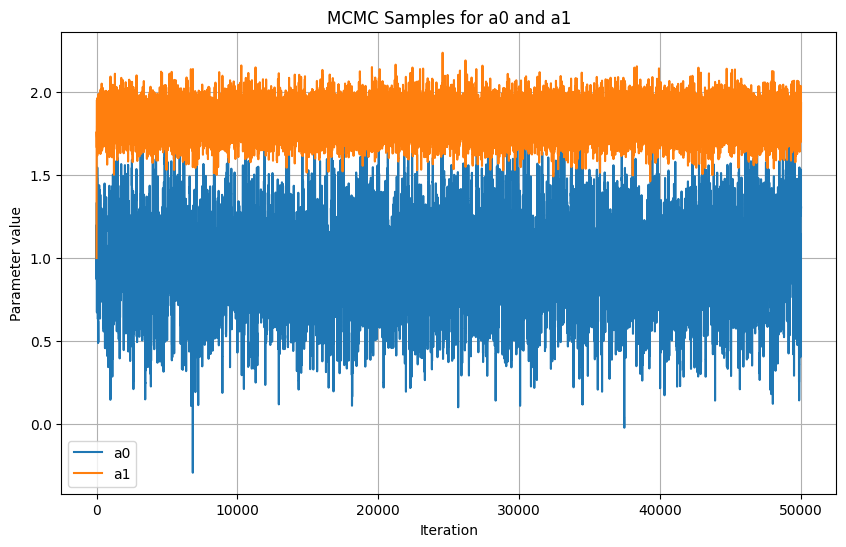

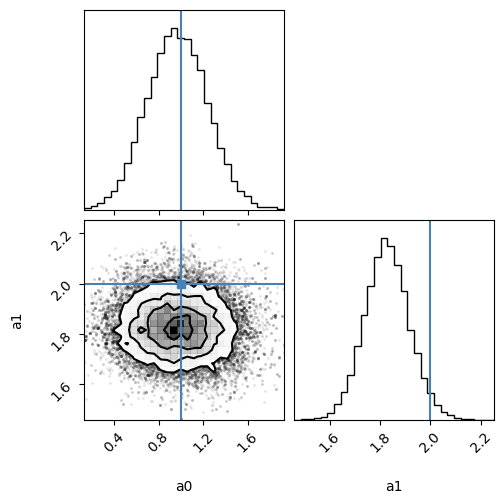

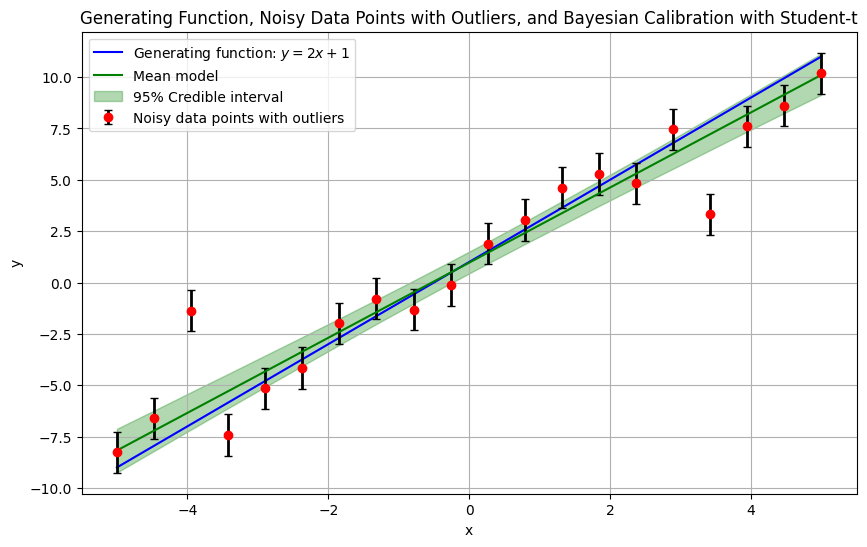

In [91]:
import scipy.stats as stats

# Degrees of freedom for the Student's t-distribution
nu = 3

# Bayesian calibration using MCMC with Metropolis-Hastings algorithm
def log_likelihood(a0, a1, x, y, sigma=1, nu=3):
    y_model = a0 + a1 * x
    # Student's t-distribution log-likelihood
    return np.sum(stats.t.logpdf(y - y_model, df=nu, scale=sigma))

def log_prior(a0, a1):
    return 0  # Assuming flat priors

def log_posterior(a0, a1, x, y, sigma=1, nu=3):
    return log_prior(a0, a1) + log_likelihood(a0, a1, x, y, sigma, nu)

# Initial guess
a0, a1 = 1, 1
n_iterations = 50000
sigma_proposal = 0.2

# Storage for samples
samples = np.zeros((n_iterations, 2))
samples[0, :] = [a0, a1]

# Count the number of acceptances
n_acceptances = 0

for i in range(1, n_iterations):
    a0_proposal = a0 + np.random.normal(0, sigma_proposal)
    a1_proposal = a1 + np.random.normal(0, sigma_proposal)
    
    log_posterior_current = log_posterior(a0, a1, x, y, sigma=1, nu=nu)
    log_posterior_proposal = log_posterior(a0_proposal, a1_proposal, x, y, sigma=1, nu=nu)
    
    acceptance_prob = np.exp(log_posterior_proposal - log_posterior_current)
    
    if np.random.rand() < acceptance_prob:
        a0, a1 = a0_proposal, a1_proposal
        n_acceptances += 1
    
    samples[i, :] = [a0, a1]

# Calculate and print the acceptance ratio
acceptance_ratio = n_acceptances / n_iterations
print(f'Acceptance ratio: {acceptance_ratio:.2f}')

# Plotting the samples
plt.figure(figsize=(10, 6))
plt.plot(samples[:, 0], label='a0')
plt.plot(samples[:, 1], label='a1')
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.legend()
plt.title('MCMC Samples for a0 and a1')
plt.grid(True)
plt.show()


# Determine the limits for the corner plot
a0_min, a0_max = np.percentile(samples[:, 0], [1, 99])*(0.4,1.2)
a1_min, a1_max = np.percentile(samples[:, 1], [1, 99])*(0.9,1.1)

corner.corner(samples, labels=["a0", "a1"], truths=[1, 2], range=[(a0_min, a0_max), (a1_min, a1_max)], bins=30)
plt.show()

# Sampling 10,000 curves from the visited samples
n_samples = 10000
indices = np.random.choice(range(n_iterations), n_samples, replace=True)
sampled_a0 = samples[indices, 0]
sampled_a1 = samples[indices, 1]

# Generate y values for each sampled parameter set
y_samples = np.array([a0 + a1 * x for a0, a1 in zip(sampled_a0, sampled_a1)])

# Calculate mean and credible intervals for each x
y_mean = np.mean(y_samples, axis=0)
y_lower = np.percentile(y_samples, 2.5, axis=0)
y_upper = np.percentile(y_samples, 97.5, axis=0)

# Plotting the estimated mean model and credible intervals
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Generating function: $y = 2x + 1$', color='blue')
plt.errorbar(x, y, yerr=noise_size, fmt='o', color='red', label='Noisy data points with outliers', ecolor='black', elinewidth=2, capsize=3)
plt.plot(x, y_mean, label='Mean model', color='green')
plt.fill_between(x, y_lower, y_upper, color='green', alpha=0.3, label='95% Credible interval')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Generating Function, Noisy Data Points with Outliers, and Bayesian Calibration with Student-t')
plt.grid(True)
plt.show()
